# biLSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/steam.txt", filename="steam.txt")

('steam.txt', <http.client.HTTPMessage at 0x7fef98f34a90>)

In [3]:
total_data = pd.read_table('steam.txt', names=['label', 'reviews'])
print('전체 리뷰 개수 :',len(total_data))

전체 리뷰 개수 : 100000


In [4]:
total_data["reviews"].nunique() # 중복 없는 나머지

99892

In [5]:
total_data.drop_duplicates(subset = ["reviews"], inplace = True)

In [6]:
total_data

,label,reviews
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
...,...,...
99995,0,한글화해주면 10개산다
99996,0,개쌉노잼 ㅋㅋ
99997,0,노잼이네요... 30분하고 지웠어요...
99998,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


In [7]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 74919
테스트용 리뷰의 개수 : 24973


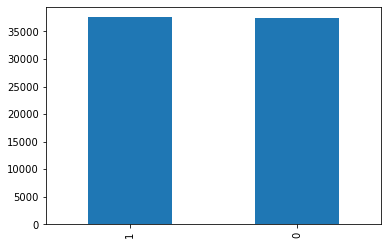

In [8]:
train_data['label'].value_counts().plot(kind = 'bar')

In [50]:
train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

label        0
reviews      0
tokenized    0
dtype: int64


/Users/elie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [51]:
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

label        0
reviews      0
tokenized    0
dtype: int64


In [52]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 24921


In [12]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']
okt=Okt()

In [13]:
train_data['tokenized'] = train_data['reviews'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

<ipython-input-13-0daf2f2730ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tokenized'] = train_data['reviews'].apply(okt.morphs)
<ipython-input-13-0daf2f2730ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


In [27]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [28]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [29]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('.', 19917), ('...', 5155), ('..', 4137), (',', 3990), ('안', 3968), ('로', 3727), ('너무', 3470), ('?', 3133), ('못', 3069), ('으로', 3039), ('하고', 2603), ('할', 2390), ('개', 2275), ('그냥', 2158), ('거', 2157), ('적', 2152), ('하는', 2131), ('왜', 2044), ('에서', 2028), ('것', 2004)]
[('.', 24143), (',', 4830), ('로', 3535), ('...', 3478), ('으로', 3452), ('!', 3420), ('..', 3079), ('할', 2710), ('플레이', 2684), ('입니다', 2381), ('적', 2362), ('것', 2347), ('때', 2267), ('하는', 2267), ('너무', 2250), ('추천', 2238), ('좀', 2174), ('?', 2140), ('갓', 2124), ('안', 2052)]


긍정 리뷰의 평균 길이 : 15.048903923501053
부정 리뷰의 평균 길이 : 15.314720676369863


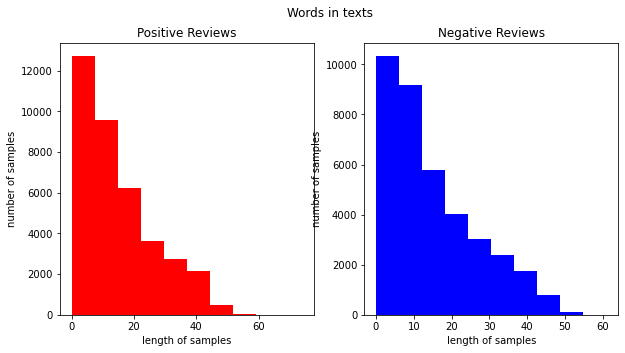

In [30]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [31]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values

In [32]:
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [34]:
total_cnt = len(tokenizer.word_index) # 단어의 수
threshold = 2

In [35]:
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [36]:
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

In [37]:
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 75487
등장 빈도가 1번 이하인 희귀 단어의 수: 41404
단어 집합에서 희귀 단어의 비율: 54.84917932889106
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.640283316804175


In [40]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 34085


In [43]:
tokenizer.fit_on_texts(X_train)

In [45]:
tokenizer = Tokenizer(vocab_size, oov_token = "OOV")

In [46]:
tokenizer.fit_on_texts(X_train)

In [48]:
tokenizer.texts_to_sequences(X_train)

[[288, 11, 21, 68, 103, 640, 2124, 1203, 510, 43, 35, 324, 95, 22, 24, 54],
 [46, 191, 255, 148, 1101, 41, 76, 5, 16199, 1, 53],
 [792, 1679, 98],
 [5365,
  265,
  9727,
  2,
  154,
  682,
  70,
  2177,
  361,
  632,
  82,
  2,
  34,
  78,
  26,
  90,
  12580,
  235,
  129,
  179,
  2597,
  7603,
  12581,
  3237,
  68,
  325,
  2846,
  14,
  536,
  28,
  2125,
  272,
  2],
 [52, 953, 2],
 [87,
  3471,
  46,
  80,
  11427,
  37,
  202,
  586,
  11428,
  724,
  2561,
  1372,
  185,
  89,
  98,
  2,
  218,
  8,
  9075,
  307,
  930,
  9076],
 [1306, 2361, 7, 14207, 2, 6014, 1, 4413, 161, 8048, 2],
 [3472, 110, 1119, 12, 128, 466, 453, 741, 1, 217, 1, 2, 143, 541, 2],
 [2178,
  3533,
  2598,
  3078,
  69,
  1325,
  449,
  1,
  7220,
  2789,
  936,
  248,
  449,
  7,
  2993],
 [1959, 634],
 [105,
  127,
  4003,
  3663,
  7,
  142,
  39,
  1002,
  105,
  117,
  1585,
  2126,
  160,
  33,
  47,
  141,
  48,
  469,
  105,
  127,
  1546,
  253,
  18,
  8522],
 [251, 2, 131, 20, 67, 7, 429, 63, 

In [49]:
X_train[1]

['1', '편', '나름', '재밌게', '했으면', '그', '걸', '로', '멈추는게', '좋았네', '....']

In [53]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))

리뷰의 최대 길이 : 74
리뷰의 평균 길이 : 15.181516037320305


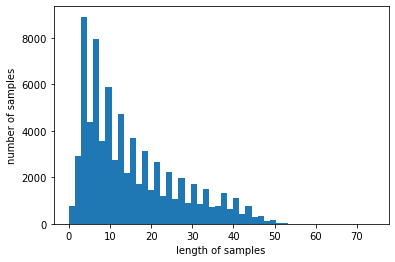

In [54]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [55]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [56]:
max_len = 60
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 99.99733045021956


In [57]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [58]:
max_len = 60
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 100.0


In [59]:
import re
from keras.layers import Embedding, Dense, LSTM, Bidirectional
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [60]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         3408500   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 3,569,501
Trainable params: 3,569,501
Non-trainable params: 0
_________________________________________________________________


In [62]:
# earlystopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [63]:
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [64]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2)

Epoch 1/15
235/235 [==============================] - ETA: 0s - loss: 0.5179 - acc: 0.7450
Epoch 00001: val_acc improved from -inf to 0.78330, saving model to best_model.h5
235/235 [==============================] - 62s 264ms/step - loss: 0.5179 - acc: 0.7450 - val_loss: 0.4605 - val_acc: 0.7833
Epoch 2/15
235/235 [==============================] - ETA: 0s - loss: 0.4052 - acc: 0.8188
Epoch 00002: val_acc did not improve from 0.78330
235/235 [==============================] - 60s 256ms/step - loss: 0.4052 - acc: 0.8188 - val_loss: 0.5043 - val_acc: 0.7633
Epoch 3/15
235/235 [==============================] - ETA: 0s - loss: 0.3676 - acc: 0.8401
Epoch 00003: val_acc improved from 0.78330 to 0.79084, saving model to best_model.h5
235/235 [==============================] - 62s 266ms/step - loss: 0.3676 - acc: 0.8401 - val_loss: 0.4550 - val_acc: 0.7908
Epoch 4/15
235/235 [==============================] - ETA: 0s - loss: 0.3421 - acc: 0.8537
Epoch 00004: val_acc did not improve from 0.790

In [65]:
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_test, y_test)

781/781 [==============================] - 9s 11ms/step - loss: 0.4651 - acc: 0.7853


[0.46505627036094666, 0.7852880954742432]

In [66]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [73]:
sentiment_predict('보면 후회해')

64.60% 확률로 긍정 리뷰입니다.


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X,
          train_y,
          epochs=10,
          batch_size=32,
          validation_data=(test_X, test_y))
